# İtalya Virus Yayılım Grafiği - Curve Fitting Problem


Bu virüs deli gibi yayılıyor. İşe biraz bilimsel açıdan yaklaşalım. 

Hani **bilgisayar bilimi** okuyoruz ya. Madem **Data Science** gibi kavramlar da yaygınlaşıyor. İtalya'daki caselerin artış grafiğine curve fit edip, önümüzdeki günlerde neler olabilir bir bakalım. 

Curve fit edeceğimiz veri aşağıda resimle gösterilmiştir:

<img src="https://cow.ceng.metu.edu.tr/uploads/default/original/2X/5/5b18c0741964c380b5d8c6aac54dbe364cc3e3c0.png" alt="coronavirus italy graph" width="600px" align="left">



Öncelikle aşağıdaki sayfadan İtalya'nın verilerine erişelim:
[https://www.worldometers.info/coronavirus/country/italy](https://www.worldometers.info/coronavirus/country/italy)

1. Orada "Total Coronavirus Cases in Italy" başlıklı grafik üzerinde çalışacağımızı varsayalım.

2. Sayfanın üzerinde sağ tuş ---> sayfa kaynağını görüntüle diyelim.
CTRL+F arama tuş kombinasyonu ile "Total Cases" diye aratalım. 

<img src="https://cow.ceng.metu.edu.tr/uploads/default/original/2X/e/e2c53db7cc5c584d941ee4d909c014890f1aaae4.png" alt="coronavirus italy graph" width="960px" align="center">


3.  Şimdi Python tarafına geçelim. Anaconda **Python 3.7** ve **Jupyter notebook** kurulu olduğunu varsayarak işlemlere devam edelim. Eğer yoksa bunları 5-10 dakika içinde kuralım.

4. Aşağıdaki resimlerde adım adım açıklama bulunmaktadır. Onlara bakalım:


## Öncelikle gerekli kütüphaneleri ekleyelim

In [2]:
# bu kütüphane np kısaltmasıyla bütün data işleri için
import numpy as np

# bu kütüphane grafik çizdirmek için
import matplotlib.pyplot as plt

## xAxis ve yAxis verilerini site kaynağından kopyalayalım

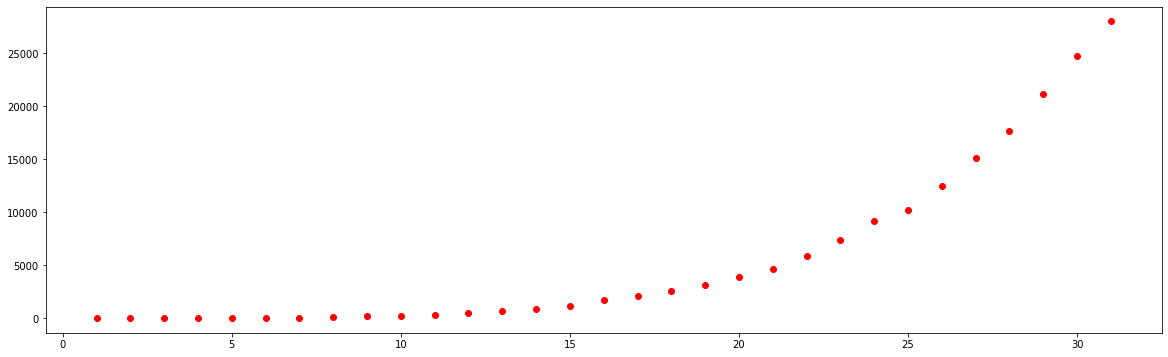

In [3]:
x_data = ["Feb 15","Feb 16","Feb 17","Feb 18","Feb 19","Feb 20","Feb 21","Feb 22","Feb 23","Feb 24","Feb 25","Feb 26","Feb 27","Feb 28","Feb 29","Mar 01","Mar 02","Mar 03","Mar 04","Mar 05","Mar 06","Mar 07","Mar 08","Mar 09","Mar 10","Mar 11","Mar 12","Mar 13","Mar 14","Mar 15","Mar 16"]
y_data = [3,3,3,3,3,4,21,79,157,229,323,470,655,889,1128,1701,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,15113,17660,21157,24747,27980]

x_data = np.arange(1, len(y_data)+1) # x_data'yı 1 .. 31 şeklinde artan gün sayılarına çeviriyoruz.

plt.figure(figsize=(20, 6)) # plot boyutunu 20,6 olacak şekilde seçtim
plt.scatter(x_data, y_data, color='red') 

## Data'ya oturtacağımız test fonksiyonunu belirleyelim (tabiki üstsel yani exp)

In [4]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.exp(b * x)

params, params_cov = optimize.curve_fit(test_func, x_data, y_data)

print("Exponential funcion coefficients:") 
print(params) 
print("Covariance of coefficients:") 
print(params_cov) 

Exponential funcion coefficients:
[120.02529489   0.17731157]
Covariance of coefficients:
[[ 1.28120792e+02 -3.69039274e-02]
 [-3.69039274e-02  1.07314988e-05]]


In [5]:
# optimize.curve_fit() fonksiyonunun bize verdiği params[0] ve params[1] parametrelerine
# sırasıyla a ve b diyecek olursak genel denklemimiz:
# ans = a * e^(b*t) olur (t gün cinsinden zamandır)

ans = (params[0]*(np.exp(params[1]*x_data))) 

In [6]:
# dolayısıyla genel denklemimiz (İtalya için): 120 e^(0.17 * t) şeklindedir.

# t=10 için 

120 * np.exp(0.177 * 10)

704.5024033659122

In [7]:
# t=20 için 

120 * np.exp(0.177 * 20)

4136.030302902886

In [16]:
# t=32 için 

120 * np.exp(0.177 * 32)

34595.94448576838

In [13]:
# t=35 için 

120 * np.exp(0.177 * 35)

58834.9733997621

## ans içinde tutulan curve ile orjinal data'yı aynı yerde plot edelim

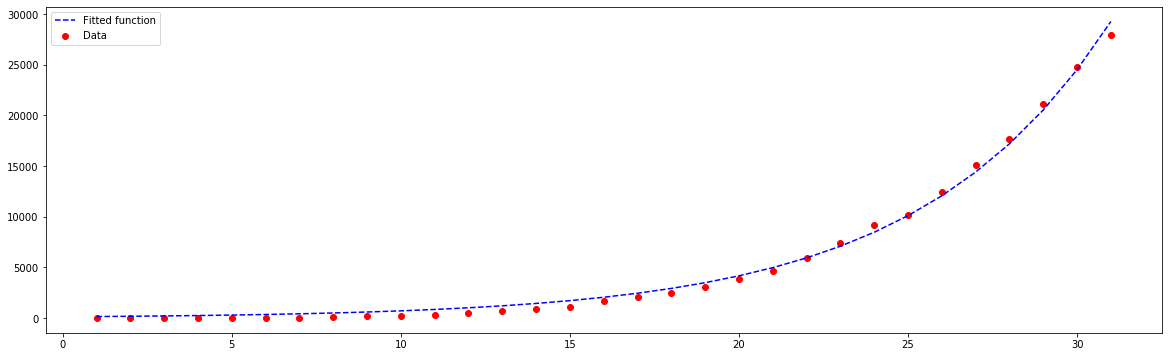

In [5]:
plt.figure(figsize=(20, 6))
plt.scatter(x_data, y_data, color = 'red', label='Data')
plt.plot(x_data,  ans, '--', color ='blue', label='Fitted function')

plt.legend(loc='best')

plt.show()

t=35 için **yani 35. gün için** case sayısı çok korkutucu **58.834**. Umarım öyle olmaz, ama istatistik böyle diyor.

### Son olarak:

Yazımın sonuna geldik. Ödev olarak size bunun Türkiye ya da başka bir ülke versiyonunu yapmanızı tavsiye ederim. Eğer hiç **numpy** vs. tecrübeniz olmamışsa mutlaka uğraşıp elinizi kirletin. Türkiye olarak sonuçlar ürkütecek olsa da tedbiri elden bırakmayarak bir miktar belki sonuçları curve dışına itebiliriz. Allah ya da tanrı ya da neyse yardımcımız olsun...

## Referanslar
* https://mehmet-akif-akkus.gitbook.io/numpy-ile-veri-bilimi/ozel-diziler
* https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb
* http://scipy-lectures.org/intro/scipy/auto_examples/plot_curve_fit.html
* https://www.geeksforgeeks.org/scipy-curve-fitting/
* https://tr.khanacademy.org/math/algebra2/exponential-growth-and-decay-alg-2
* https://idari.cu.edu.tr/sanli/matikt1-5.pdf
* https://www.digitalocean.com/community/tutorials/how-to-crawl-a-web-page-with-scrapy-and-python-3